In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics         import f1_score, accuracy_score, balanced_accuracy_score, plot_confusion_matrix

# Data

In [2]:
y = np.load("data/train_y.npy")
x = np.c_[ np.load("data/scalogram30_train.npy"), np.load("data/window_train.npy")]
t = np.c_[ np.load("data/scalogram30_test.npy"),  np.load("data/window_test.npy")]


# Combine feat columns in numpy
# https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array
#np.c_[ matrix, array, ... ]

x.shape, y.shape, t.shape

((5000000, 31), (5000000,), (2000000, 31))

In [3]:
x0 = x[      0: 500000]; y0 = y[      0: 500000]
x1 = x[ 500000:1000000]; y1 = y[ 500000:1000000]
x2 = x[1000000:1500000]; y2 = y[1000000:1500000]
x3 = x[1500000:2000000]; y3 = y[1500000:2000000]
x4 = x[2000000:2500000]; y4 = y[2000000:2500000]
x5 = x[2500000:3000000]; y5 = y[2500000:3000000]
x6 = x[3000000:3500000]; y6 = y[3000000:3500000]
x7 = x[3500000:4000000]; y7 = y[3500000:4000000]
x8 = x[4000000:4500000]; y8 = y[4000000:4500000]
x9 = x[4500000:5000000]; y9 = y[4500000:5000000]

t01 = t[      0: 100000]
t02 = t[ 100000: 200000]
t03 = t[ 200000: 300000]
t04 = t[ 300000: 400000]
t05 = t[ 400000: 500000]
t11 = t[ 500000: 600000]
t12 = t[ 600000: 700000]
t13 = t[ 700000: 800000]
t14 = t[ 800000: 900000]
t15 = t[ 900000:1000000]
t2  = t[1000000:1500000]
t3  = t[1500000:2000000]

In [4]:
# train_test_split(x, y, test_size=0.1, shuffle=False)
x_train = x4; y_train = y4
x_valid = x9; y_valid = y9

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((500000, 31), (500000,), (500000, 31), (500000,))

## Models

In [5]:
from sklearn.linear_model import LogisticRegression
from lightgbm             import LGBMClassifier

lin = LogisticRegression(multi_class='multinomial', n_jobs=-1)
lgb = LGBMClassifier()

## Train

In [6]:
%%time
lin.fit(x_train, y_train)

CPU times: user 43.7 ms, sys: 93.2 ms, total: 137 ms
Wall time: 47 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
%%time
lgb.fit(x_train, y_train)

CPU times: user 1min 14s, sys: 228 ms, total: 1min 14s
Wall time: 19.4 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Predict

In [9]:
preds_lin = lin.predict(x_valid); probs_lin = lin.predict_proba(x_valid)
#preds_lgb = lgb.predict(x_valid);     probs_lgb = lgb.predict_proba(x_valid)

preds = preds_lin
probs = probs_lin

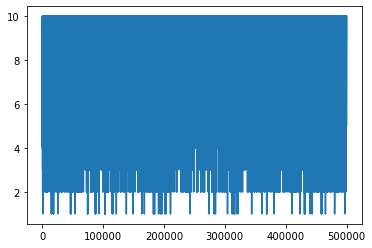

In [10]:
plt.plot(preds);

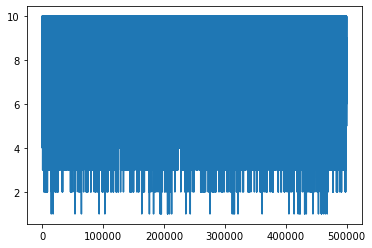

In [11]:
plt.plot(y_valid);

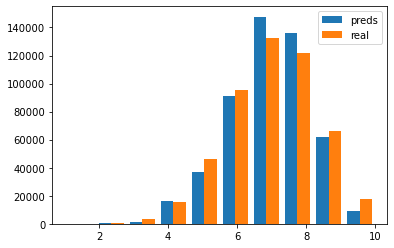

In [12]:
plt.hist([preds, y_valid], label=['preds', 'real'])
plt.legend(loc='upper right')
plt.show()

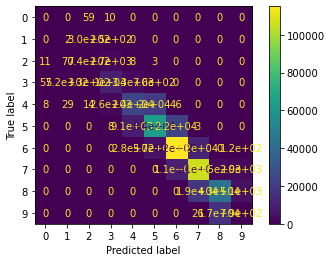

In [14]:
plot_confusion_matrix(lin, x_valid, y_valid);

In [15]:
print("Accuracy:    ", accuracy_score(y_valid, preds))
print("Balanced acc:", balanced_accuracy_score(y_valid, preds))
print("F1 score:    ", f1_score(y_valid, preds, average='macro'))

Accuracy:     0.72777
Balanced acc: 0.4502688430179604
F1 score:     0.4599797645366073


# Obtenido en grupo 5
(entreno con tr4 y predigo tr9)

| Datos originales | Datos trans 2D   | Modelo            | Tiempo |   F1 Macro   | Accuracy | Bal. Acc. |
|------------------|------------------|-------------------|--------|--------------|----------|-----------|
|        -         | Scalograma de 30 | LogRegr basico    | 42.9 s |   0.251091   | 0.428094 | 0.238886  |
|        -         | Scalograma de 30 | LightGBM basico   | 23.4 s |   0.238182   | 0.385802 | 0.257626  |
| ventana de [1]   | Scalograma de 30 | LogRegr basico    | 47.0 s |   0.459979   | 0.727770 | 0.450268  |
| ventana de [1]   | Scalograma de 30 | LightGBM basico   | 19.4 s | **0.624848** | 0.859116 | 0.690491  |
| ventana de [7]   | -                | Net7              |        | **0.75..**   | 0.85     | 0.83      |
| ventana de [7]   | -                | Net7 BatchNorm    |        | **0.849245** | 0.884408 | 0.892884  |

# Objetivo

| Group |   Tio 1    |  Tio 2       | Zidmie (ant)| Zidmie (4o) |
|-------|------------|--------------|-------------|-------------|
|   1   |   0.9973   |   0.997431   |   0.9955    | 0.9959      |
|   2   |   0.9832   |   0.997103   |   0.9969    | 0.9969      |
|   3   |   0.9712   |   0.984124   |   0.9858    | 0.9864      |
|   4   |   0.9969   |   0.972676   |   0.9711    | 0.9747      |
|   5   | **0.8676** |   0.793126   | **0.8726**  | **0.8746**  |
| Total |            |              |             | 0.9424      |
| LB    |            |              |             | 0.944       |

- [Tio 1](https://www.kaggle.com/c/liverpool-ion-switching/discussion/140203)
- [Tio 2](https://www.kaggle.com/c/liverpool-ion-switching/discussion/147154) 